In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [15]:
df = pd.read_csv('data/final_cohort.csv')

In [18]:
df.head()

,Date,knumber,Name,Manufactuer,Specialty,Product_Code,artificial_intelligence1,machine_learning1,neural_network1,neural_networks1,deep_learning1,reinforcement_learning1,natural_language_processing1,decision_tree1,xgboost1,gradient_boosted1,gradient_boosting1,ensemble1,big_data1,AI1,ML1,DL1,DNN1,CNN1,RNN1,NLP1,phantom1,specificity1,sensitivity1,risk_assessment1,time_to_open1,time_to_notification1,human_factor1,ease_of_use1,ease_of_training1,standards1,industry_standards1,risk_management1,risk1,retrospective1,prospective1,summary1,FDA,STUDY,CLINICAL_TRIALS,STUDY_SIZE,Site,STATE,COUNTRY_CODE,CT,multisite,Performance,Jiang,REVIEW_PANEL,MEDICALSPECIALTY,DEVICENAME,DEVICECLASS,UNCLASSIFIED_REASON,GMPEXEMPTFLAG,THIRDPARTYFLAG,REVIEWCODE,REGULATIONNUMBER,SUBMISSION_TYPE_ID,DEFINITION,PHYSICALSTATE,TECHNICALMETHOD,TARGETAREA,Implant_Flag,Life_Sustain_support_flag,SummaryMalfunctionReporting,summary,key_index,year,study1,path
0,08/21/2013,DEN130013,Vitek MS,"Biomerieux, Inc.",Other,PEX,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,NaN,2256.0,3,MO,US,0,1,1,0,MI,MI,"System, Mass Spectrometry, Maldi Tof, Microorg...",2,NaN,N,N,NaN,866.3361,1,A mass spectrometer system using matrix-assist...,In vitro diagnostic device,Matrix-assisted laser desorption/ionization - ...,Identification of microorganisms cultured from...,N,N,Ineligible,1,1,2013,1,DEN
1,02/10/2004,K033840,CellaVision DM96 Automatic Hematology Analyzer,Cella Vision AB,Other,JOY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,MN,US,0,0,1,0,HE,HE,"Device, Automated Cell-Locating",2,NaN,N,Y,NaN,864.5260,1,NaN,NaN,NaN,NaN,N,N,Eligible,1,1,2004,0,510K
2,12/05/2008,K080595,CellaVision DM96 with the body fluid application,Cella Vision AB,Other,JOY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,MN,US,0,0,1,0,HE,HE,"Device, Automated Cell-Locating",2,NaN,N,Y,NaN,864.5260,1,NaN,NaN,NaN,NaN,N,N,Eligible,1,1,2008,0,510K
3,05/12/2010,K092116,EasyCell,Medica Corporation,Other,JOY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,MA,US,0,0,1,0,HE,HE,"Device, Automated Cell-Locating",2,NaN,N,Y,NaN,864.5260,1,NaN,NaN,NaN,NaN,N,N,Eligible,1,1,2010,0,510K
4,09/16/2011,K102778,CellaVision� DM1200 with the body fluid applic...,CellaVision AB,Other,JOY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,NaN,NaN,2,MN,US,0,1,1,0,HE,HE,"Device, Automated Cell-Locating",2,NaN,N,Y,NaN,864.5260,1,NaN,NaN,NaN,NaN,N,N,Eligible,1,1,2011,0,510K


## Make Timeline in Python

In [19]:
names = df['knumber']
dates = df['Date']

In [34]:
dates

0      08/21/2013
1      02/10/2004
2      12/05/2008
3      05/12/2010
4      09/16/2011
          ...    
204    12/29/2020
205    03/02/2021
206    02/05/2021
207    11/09/2016
208    01/11/2021
Name: Date, Length: 209, dtype: object

In [35]:
dates = [datetime.strptime(x, "%m/%d/%Y") for x in dates]

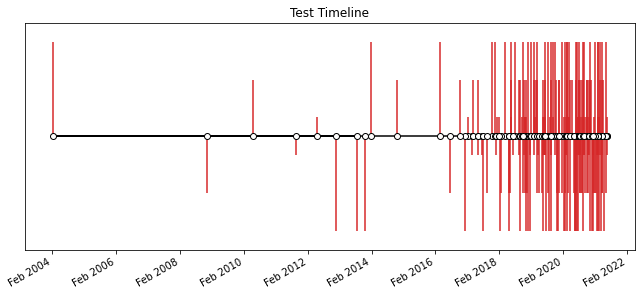

In [37]:
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Test Timeline")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
# for d, l, r in zip(dates, levels, names):
#     ax.annotate(r, xy=(d, l),
#                 xytext=(-3, np.sign(l)*3), textcoords="offset points",
#                 horizontalalignment="right",
#                 verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
#ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [49]:
df['quarter_year'].value_counts()

3/2020    26
1/2021    22
4/2020    19
1/2020    16
3/2019    15
          ..
3/2011     1
1/2004     1
2/2010     1
4/2012     1
3/2013     1
Name: quarter_year, Length: 31, dtype: int64

In [51]:
df['Specialty'].value_counts()

Radiology         161
Other              26
Cardiovascular     22
Name: Specialty, dtype: int64

In [40]:
df['month_year'] = df['Date'].apply(lambda x: x.split('/')[0] + '/' + x.split('/')[2])

In [48]:
df['quarter_year'] = df['month_year'].apply(quarter_parse)

In [47]:
def quarter_parse(x):
    if x.split('/')[0] in ['01', '02', '03']:
        return '1/' + x.split('/')[1]
    if x.split('/')[0] in ['04', '05', '06']:
        return '2/' + x.split('/')[1]
    if x.split('/')[0] in ['07', '08', '09']:
        return '3/' + x.split('/')[1]
    if x.split('/')[0] in ['10', '11', '12']:
        return '4/' + x.split('/')[1]
    

In [16]:
state_dict = df['STATE'].value_counts().to_dict()